In [28]:
import pandas as pd
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt
import holoviews as hv

df = pd.read_csv('df-reducido.csv')


In [ ]:
#Grafico de Barras Entidad - Sexo
def plot_residence_counts(sexo):
    subset_df = df[df['SEXO'] == sexo]
    plot = subset_df['ENTRESIDENCIA'].value_counts().hvplot.bar(title=f'Entidades de Pacientes (Sexo: {sexo})', rot=45)
    return plot


button = pn.widgets.RadioButtonGroup(options=['MASCULINO', 'FEMENINO'], value='MASCULINO', name='Patient Gender')


@pn.depends(sexo=button)
def update_plot(sexo):
    return plot_residence_counts(sexo)

app = pn.Column(button, update_plot)

app.servable()

Launching server at http://localhost:53284


In [49]:


#Gráfica de Barras Entidad - Padecimiento
def plot_top_afecprin_counts(entidad):
    subset_df = df[df['ENTRESIDENCIA'] == entidad]
    top_afecprin = subset_df['AFECPRIN'].value_counts().nlargest(20)
    plot = top_afecprin.hvplot.barh(width=800, height=400, title=f'Afectaciones Princiaples En: {entidad}')
    return plot

dropdown = pn.widgets.Select(options=df['ENTRESIDENCIA'].unique().tolist(), name='Entidad')

@pn.depends(entidad=dropdown)
def update_plot(entidad):
    return plot_top_afecprin_counts(entidad)


app = pn.Column(dropdown, update_plot)

app.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'d8062858-0de4-466c-950b-fc524f8f23f1': {'version…

C:\Users\alexm\AppData\Local\Temp\ipykernel_7076\1196487494.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


Launching server at http://localhost:55826


C:\Users\alexm\AppData\Local\Temp\ipykernel_7076\1196487494.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")
C:\Users\alexm\AppData\Local\Temp\ipykernel_7076\1196487494.py:66: PanelDeprecationWarning: 'style' is deprecated and will be removed in version 1.4, use 'styles' instead.
  pn.Row(pn.panel("Dashboard Del Proyecto", align="center", width=1000, style={'font-size': '48px', 'margin-bottom': '30px', 'padding-left': '40%'})),
C:\Users\alexm\AppData\Local\Temp\ipykernel_7076\1196487494.py:69: PanelDeprecationWarning: "Card(..., background='lightblue')" is deprecated and will be removed in version 1.4, use "Card(..., styles={'background': 'lightblue'})" instead.
  pn.Card(fig1, title="Histograma - Afectaciones", background="lightblue"),
C:\Users\alexm\AppData\Local\Temp\ipykernel_7076\1196487494.py:70: PanelDeprecationWarning: "Card

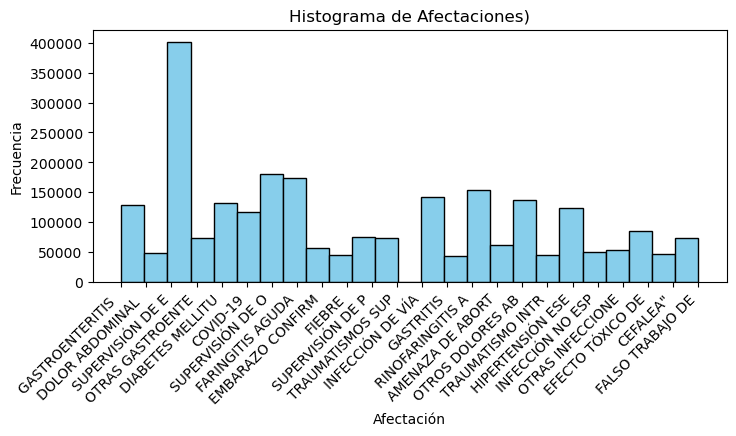

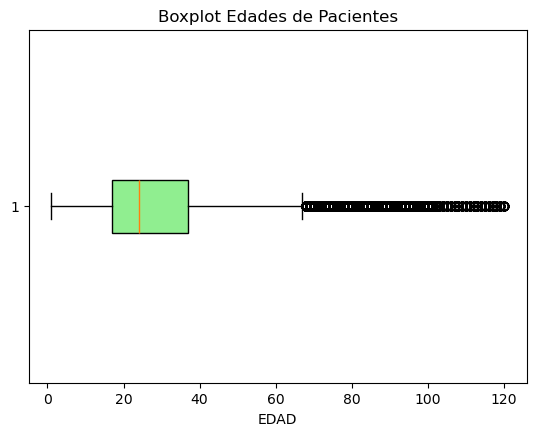

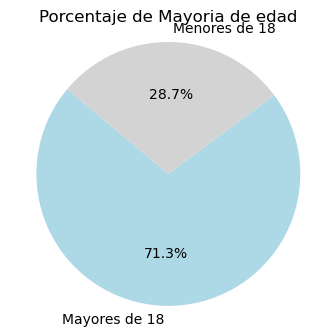

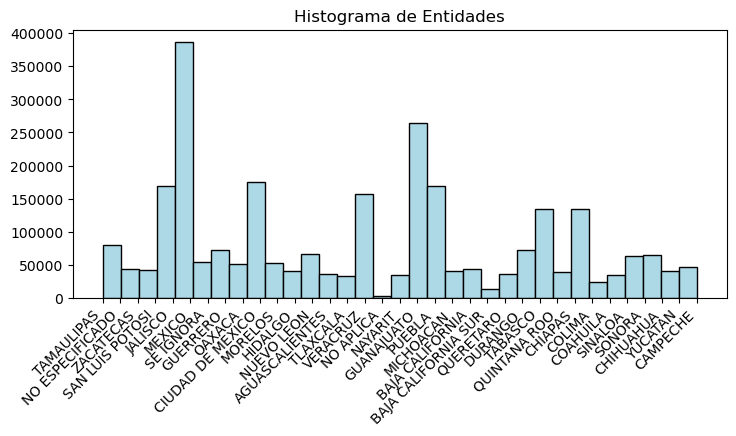

In [48]:

#Colores
cmap = ['lightblue', 'lightgrey', 'lightskyblue', 'lightcyan']
colors_pie = ['lightblue', 'lightgrey']

# Gráfico interactivo
def plot_top_afecprin_counts(entidad):
    subset_df = df[df['ENTRESIDENCIA'] == entidad]
    top_afecprin = subset_df['AFECPRIN'].value_counts().nlargest(20)
    plot = top_afecprin.hvplot.barh(width=1200, height=500, title=f'Afectaciones Princiaples En: {entidad}', color=cmap)
    return plot

dropdown = pn.widgets.Select(options=df['ENTRESIDENCIA'].unique().tolist(), name='Entidad')

@pn.depends(entidad=dropdown)
def update_plot_entidad(entidad):
    return plot_top_afecprin_counts(entidad)

#Histograma Afectaciones
top_afecprin = df['AFECPRIN'].value_counts().nlargest(25).index
df_top = df[df['AFECPRIN'].isin(top_afecprin)]
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.hist(df_top['AFECPRIN'].apply(lambda x: x[:16]), bins=25, edgecolor='black', color='skyblue')
ax1.set_xlabel("Afectación")
ax1.set_ylabel("Frecuencia")
ax1.set_title("Histograma de Afectaciones)")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout(pad=3.0)

#Boxplot Edades
fig2, ax2 = plt.subplots(figsize=(6, 5))
ax2.boxplot(df['EDAD'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax2.set_xlabel("EDAD")
ax2.set_title("Boxplot Edades de Pacientes")
plt.tight_layout(pad=3.0)

#Pie chart - Mayoría de edad
over_18 = (df['EDAD'] > 18).sum()
under_18 = len(df) - over_18
sizes = [over_18, under_18]
labels = ['Mayores de 18', 'Menores de 18']
fig3, ax3 = plt.subplots(figsize=(4, 4))
ax3.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors_pie)
ax3.set_title("Porcentaje de Mayoria de edad")
ax3.axis('equal')
plt.tight_layout(pad=3.0)

#Histograma de Entidades
fig4, ax4 = plt.subplots(figsize=(8, 5))
ax4.hist(df['ENTRESIDENCIA'], bins=33, edgecolor='black', color='lightblue')
ax4.set_title("Histograma de Entidades")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout(pad=3.0)

"""
App Column - Nos permite mostrar nuestro Dashboard en un explorador

Parámetros:
El método Row nos permite separar el contenido en filas.

Sizing mode nos permite estirar la figura para que use el espacio permitido.

Card nos permite envolver la gráfica en una pestaña desplegable para una visualización mas limpia

"""
app = pn.Column(
    pn.Row(pn.panel("Dashboard Del Proyecto", align="center", width=1000, style={'font-size': '48px', 'margin-bottom': '30px', 'padding-left': '40%'})),
    pn.Row(dropdown, update_plot_entidad, width_policy='max'),
    pn.Row(
        pn.Card(fig1, title="Histograma - Afectaciones", background="lightblue"),
        pn.Card(fig2, title="Boxplot de Edades", background="lightgreen"),
        sizing_mode='stretch_width'
    ),
    pn.Row(
        pn.Card(fig3, title="Pie Chart - Mayoría de Edad", background="lightblue"),
        pn.Card(fig4, title="Histograma - Entidades Federativas", background="lightgray"),
        sizing_mode='stretch_width'
    ),
    align='start',
    width_policy='max',
    height_policy='max',
    sizing_mode='stretch_width'
)

app.show()